In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def estimar_pi_mc(n):
    u = np.random.uniform(0, 1, n)
    resultados = 1 / (1 + u**2)
    return 4 * np.mean(resultados)

def estimar_pi_controle(n):
    u = np.random.uniform(0, 1, n)
    X = 1 / (1 + u**2)
    Y = u**2

    matriz_cov = np.cov(X, Y)
    cov_xy = matriz_cov[0, 1]
    var_y = matriz_cov[1, 1]

    c_otimo = -cov_xy / var_y
    media_Y_teorica = 1/3

    Z = X + c_otimo * (Y - media_Y_teorica)
    return 4 * np.mean(Z)

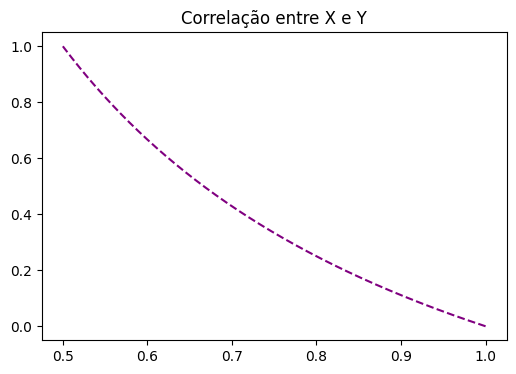

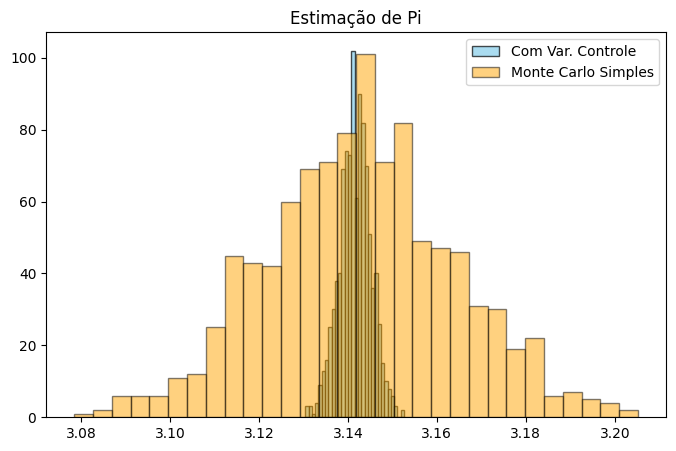

Variância Controle: 0.000012
Variância MC: 0.000444
Redução de Variância (Razão): 0.0277


In [3]:
n_simulacoes = 1000
amostra_mc = []
amostra_cont = []

for _ in range(n_simulacoes):
    amostra_cont.append(estimar_pi_controle(1000))
    amostra_mc.append(estimar_pi_mc(1000))

u_eixo = np.linspace(0, 1, 1000)
funcao_x = 1 / (1 + u_eixo**2)
funcao_y = u_eixo**2

plt.figure(figsize=(6, 4))
plt.plot(funcao_x, funcao_y, color='purple', linestyle='--')
plt.title("Correlação entre X e Y")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(amostra_cont, bins=30, color='skyblue', alpha=0.7, label='Com Var. Controle', edgecolor='black')
plt.hist(amostra_mc, bins=30, color='orange', alpha=0.5, label='Monte Carlo Simples', edgecolor='black')
plt.legend()
plt.title("Estimação de Pi")
plt.show()

var_control = np.var(amostra_cont)
var_mc = np.var(amostra_mc)

print(f"Variância Controle: {var_control:.6f}")
print(f"Variância MC: {var_mc:.6f}")
print(f"Redução de Variância (Razão): {var_control/var_mc:.4f}")

In [4]:
def integral_exp_mc(n):
    u = np.random.uniform(0, 1, n)
    res = np.exp(u)
    return np.mean(res)

def integral_exp_controle(n):
    u = np.random.uniform(0, 1, n)
    X = np.exp(u)
    Y = u

    cov_xy = np.cov(X, Y)[0, 1]
    var_y = np.var(Y, ddof=1)

    c = -cov_xy / var_y
    Z = X + c * (Y - 0.5)
    return np.mean(Z)

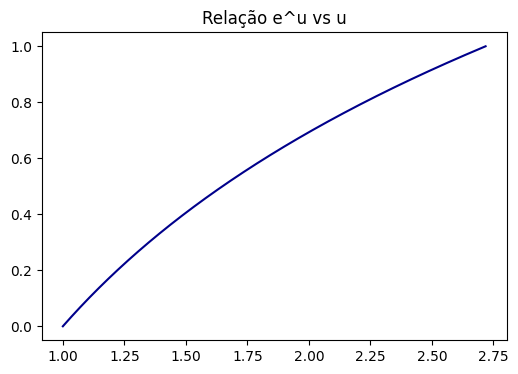

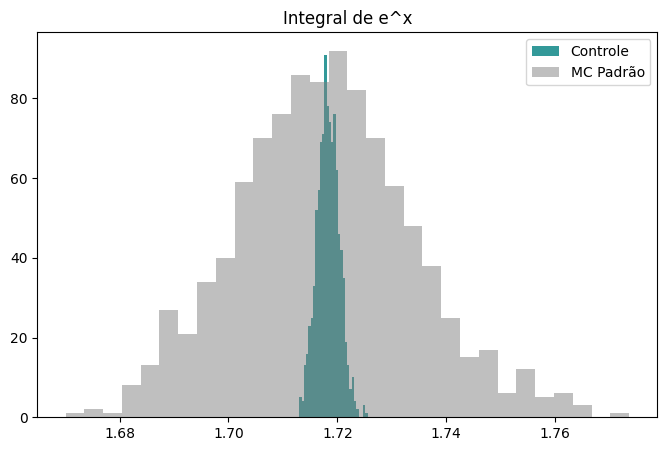

Variância Controle: 0.000004
Variância MC: 0.000262
Razão: 0.0157


In [5]:
sim_mc_exp = []
sim_cont_exp = []

for _ in range(1000):
    sim_cont_exp.append(integral_exp_controle(1000))
    sim_mc_exp.append(integral_exp_mc(1000))

u_vals = np.linspace(0, 1, 1000)
x_vals = np.exp(u_vals)
y_vals = u_vals

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, color='darkblue')
plt.title("Relação e^u vs u")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(sim_cont_exp, bins=30, color='teal', alpha=0.8, label='Controle')
plt.hist(sim_mc_exp, bins=30, color='gray', alpha=0.5, label='MC Padrão')
plt.legend()
plt.title("Integral de e^x")
plt.show()

v_cont = np.var(sim_cont_exp)
v_mc = np.var(sim_mc_exp)
print(f"Variância Controle: {v_cont:.6f}")
print(f"Variância MC: {v_mc:.6f}")
print(f"Razão: {v_cont/v_mc:.4f}")

In [6]:
def indicadora(valor, limiar):
    return (valor > limiar).astype(int)

def gerar_exponencial(n, lambd=1):
    u = np.random.uniform(0, 1, n)
    return -np.log(u) / lambd

def prob_mc_simples(n):
    amostra = gerar_exponencial(n)
    return np.mean(indicadora(amostra, 1))

def prob_controle(n):
    u = np.random.uniform(0, 1, n)
    X = -np.log(u)
    I = indicadora(X, 1)

    cov = np.cov(I, X)[0, 1]
    var_x = np.var(X, ddof=1)

    c = -cov / var_x

    Z = I + c * (X - 1)
    return np.mean(Z)

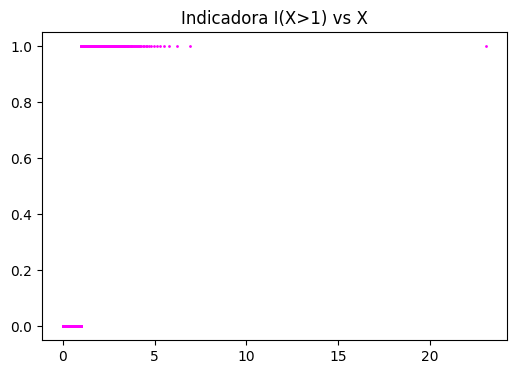

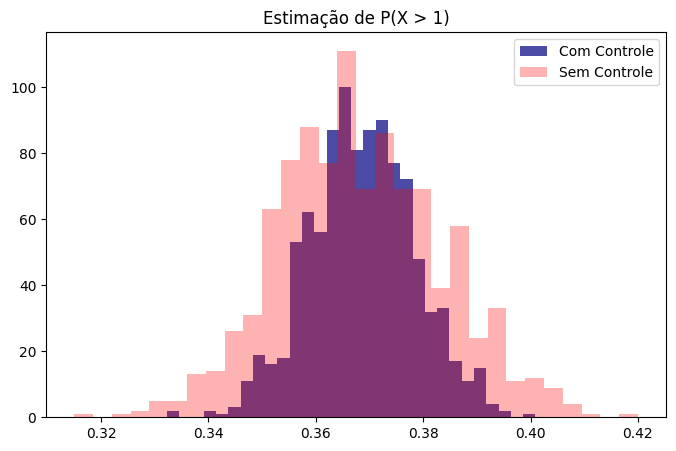

Variância Controle: 0.000097
Variância MC: 0.000233
Razão: 0.4158


In [7]:
res_mc_prob = []
res_cont_prob = []

for _ in range(1000):
    res_mc_prob.append(prob_mc_simples(1000))
    res_cont_prob.append(prob_controle(1000))

u_plot = np.linspace(0, 1, 1000)
x_plot = -np.log(u_plot + 1e-10)
y_plot = indicadora(x_plot, 1)

plt.figure(figsize=(6, 4))
plt.scatter(x_plot, y_plot, color='magenta', s=1)
plt.title("Indicadora I(X>1) vs X")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(res_cont_prob, bins=30, color='navy', alpha=0.7, label='Com Controle')
plt.hist(res_mc_prob, bins=30, color='red', alpha=0.3, label='Sem Controle')
plt.legend()
plt.title("Estimação de P(X > 1)")
plt.show()

var_p_cont = np.var(res_cont_prob)
var_p_mc = np.var(res_mc_prob)

print(f"Variância Controle: {var_p_cont:.6f}")
print(f"Variância MC: {var_p_mc:.6f}")
print(f"Razão: {var_p_cont/var_p_mc:.4f}")